Polynomial regression with tensorflow

200 randomly generated data

learning rate : 0.01

train : 10 times

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


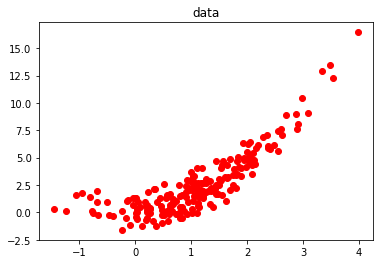

In [12]:
import tensorflow as tf
import numpy as np
import random as random
import matplotlib.pyplot as plt

num_points = 200
x = []
y = []
param = [1, 0.1, 0.3]
for i in range(num_points):
    temp_x = np.random.normal(1.0, 1)
    # noise
    temp_y = param[0] * temp_x ** 2 + param[1] * temp_x + param[2] + np.random.normal(0.0, 1.0)
    x.append(temp_x)
    y.append(temp_y)

# check data
plt.plot(x, y, 'ro')
plt.title('data')
plt.show()

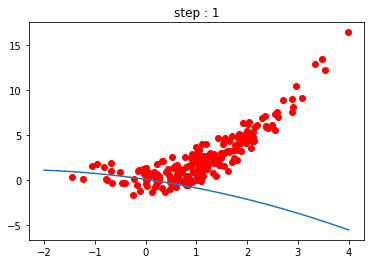

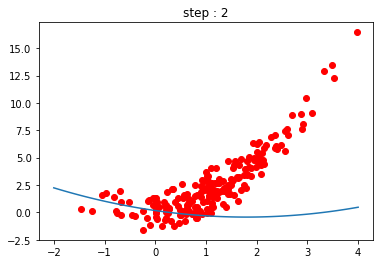

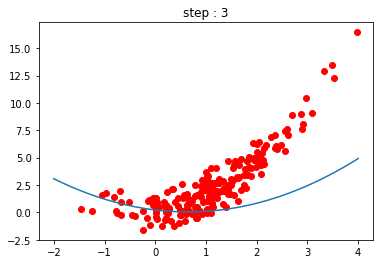

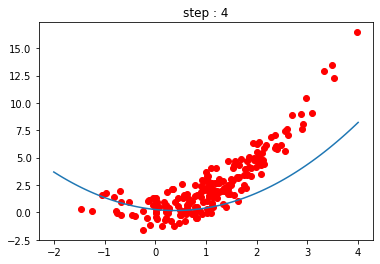

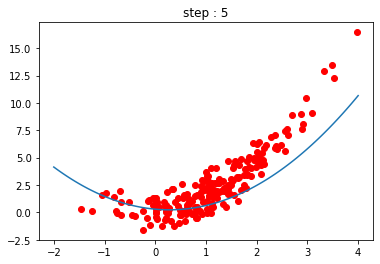

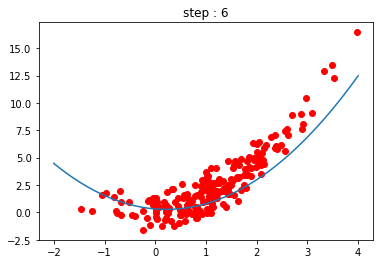

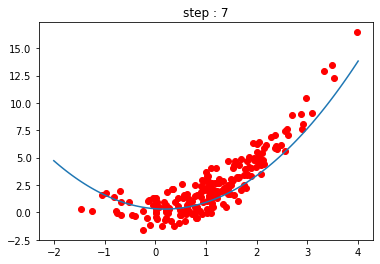

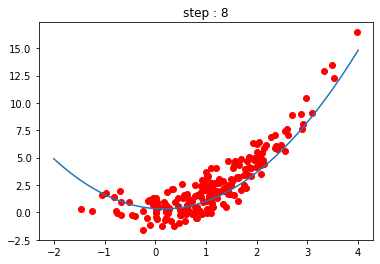

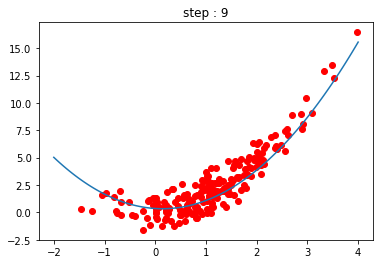

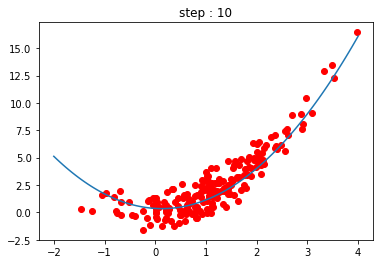

In [19]:
# parameters to optimize
W1 = tf.Variable([-0.6])
W2 = tf.Variable([-1.0])
b = tf.Variable(tf.zeros([1]))

# make loss function : MSE(mean square error)
loss = 0
for i in range(num_points):
  y_pred = W1 * (x[i] ** 2) + W2 * x[i] + b
  loss += (y[i] - y_pred)**2
loss = loss/num_points


# set optimizer with learning rate(0.01)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)
init = tf.global_variables_initializer()

# make session
sess = tf.Session()
sess.run(init)

W1_list = []
W2_list = []
b_list = []
loss_list = []
x_ = np.linspace(-2,4,100)

# training
for step in range(10):
  sess.run(train)

  # check data and model
  plt.plot(x, y, 'ro')
  y_ = sess.run(W1).item() * x_**2 + sess.run(W2).item() * x_ + sess.run(b).item()
  plt.plot(x_, y_)
  plt.title('step : ' + str(step + 1))
  plt.show()

  # store W, b, loss data
  W1_list.append(round(sess.run(W1).item(), 2))
  W2_list.append(round(sess.run(W2).item(), 2))
  b_list.append(round(sess.run(b).item(), 2))
  loss_list.append(round(sess.run(loss).item(), 2))

true value of W1, W2, b :  [1, 0.1, 0.3]
W1 :  [-0.15, 0.19, 0.43, 0.62, 0.75, 0.85, 0.93, 0.98, 1.02, 1.05]
W2 :  [-0.81, -0.67, -0.56, -0.48, -0.42, -0.37, -0.34, -0.31, -0.29, -0.28]
b :  [0.1, 0.17, 0.22, 0.26, 0.29, 0.31, 0.33, 0.34, 0.35, 0.36]
loss :  [27.75, 15.78, 9.18, 5.54, 3.53, 2.42, 1.81, 1.47, 1.29, 1.18]


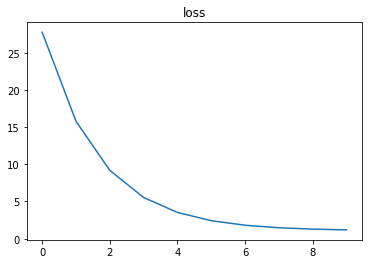

In [20]:
# check training procedure
print("true value of W1, W2, b : ", param)
print("W1 : ", W1_list)
print("W2 : ", W2_list)
print("b : ", b_list)
print("loss : ", loss_list)
plt.plot(loss_list)
plt.title('loss')
plt.show()